##  Building an Image Classifier Using the Sequential API

In [27]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore")

print(f"Tensorflow: {tf.__version__}")
print(f"Keras: {keras.__version__}")

models_dir = "./models"
logs_dir = "./logs"

Tensorflow: 2.15.0
Keras: 2.15.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape

(60000, 28, 28)

In [3]:
y_train_full.shape

(60000,)

In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
output_length = len(class_names)
output_length

10

### Creating the Model Using the Sequential API

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:])) # X_train.reshape(-1, 1)
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
model.add(keras.layers.Dense(output_length, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model’s summary() method displays all the model’s layers13, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters.

In [7]:
print(model.layers)
print(model.layers[0].name)
layers_name = [layer.name for layer in model.layers]
layers_name

[<keras.src.layers.reshaping.flatten.Flatten object at 0x0000017EAF708150>, <keras.src.layers.core.dense.Dense object at 0x0000017EB07B4090>, <keras.src.layers.core.dense.Dense object at 0x0000017EAF6F5C90>, <keras.src.layers.core.dense.Dense object at 0x0000017EB0AEDA10>]
flatten


['flatten', 'dense', 'dense_1', 'dense_2']

In [8]:
hidden_layer = model.get_layer(layers_name[1])
weights, biases = hidden_layer.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [9]:
weights

array([[ 0.06660174,  0.01684074,  0.05233055, ...,  0.00703537,
         0.07025374,  0.03781852],
       [ 0.05958168,  0.06113206,  0.03937369, ...,  0.07203975,
        -0.02082023, -0.02218516],
       [ 0.04791977,  0.00126714, -0.03268095, ..., -0.04279016,
        -0.05466526,  0.02241866],
       ...,
       [ 0.03992472,  0.05759546, -0.06508361, ...,  0.0183254 ,
         0.01775112, -0.01837265],
       [-0.03986507, -0.00359248, -0.0427481 , ..., -0.06563781,
        -0.03834514, -0.03505009],
       [ 0.01122111,  0.0127171 ,  0.04918212, ...,  0.07310326,
         0.02756535,  0.00327751]], dtype=float32)

In [10]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

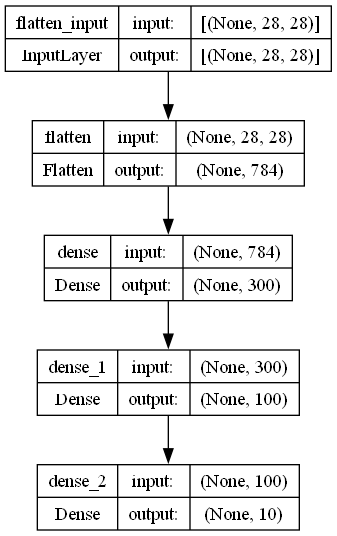

In [7]:
keras.utils.plot_model(model, "mlp_fmnist_classifier.png", show_shapes=True)

### Compiling the Model

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

###  Training and Evaluating the Model

In [9]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 5s 3ms/step - loss: 0.7055 - accuracy: 0.7713 - val_loss: 0.5225 - val_accuracy: 0.8164
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4851 - accuracy: 0.8312 - val_loss: 0.4647 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4421 - accuracy: 0.8449 - val_loss: 0.4253 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4164 - accuracy: 0.8543 - val_loss: 0.3926 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3959 - accuracy: 0.8612 - val_loss: 0.3864 - val_accuracy: 0.8632
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3798 - accuracy: 0.8678 - val_loss: 0.3741 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3655 - accuracy: 0.8716 - val_loss: 0.3695 - val_accurac

In [13]:
print(history.params)
print(history.epoch)
print(history.history)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'loss': [0.7017987966537476, 0.48122477531433105, 0.43818730115890503, 0.4116729497909546, 0.39284080266952515, 0.37668439745903015, 0.36511629819869995, 0.3528686761856079, 0.3439815938472748, 0.33454692363739014, 0.3253174126148224, 0.31745070219039917, 0.3106684982776642, 0.3033636510372162, 0.29745715856552124, 0.29129862785339355, 0.284566730260849, 0.2801539897918701, 0.274711549282074, 0.26991233229637146, 0.26390114426612854, 0.2599109411239624, 0.2542021870613098, 0.2501297891139984, 0.24553418159484863, 0.24262498319149017, 0.23789170384407043, 0.23482438921928406, 0.23059234023094177, 0.22725453972816467], 'accuracy': [0.7716909050941467, 0.8324363827705383, 0.8472727537155151, 0.8551818132400513, 0.8615272641181946, 0.8668000102043152, 0.871999979019165, 0.8752909302711487, 0.8776181936264038, 0.8807818293571472, 0.88332

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8856


[0.3278040587902069, 0.8855999708175659]

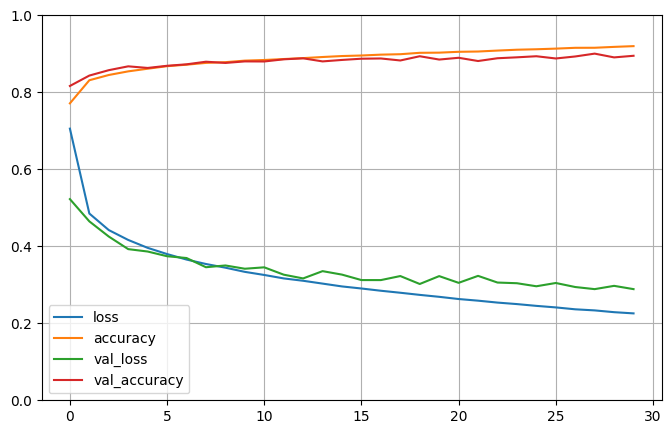

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Using the Model to Make Predictions

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(np.array(class_names)[y_pred])

print(y_test[:3])
print(np.array(class_names)[y_test[:3]])



1/1 [==============================] - 0s 28ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


### Creating the Model Using the Functional API

In [13]:
input = keras.layers.Input(shape=X_train.shape[1:])
flatten_layer = keras.layers.Flatten()
hidden1_layer = keras.layers.Dense(300, activation='relu')
hidden2_layer = keras.layers.Dense(100, activation=keras.activations.relu)
output_layer = keras.layers.Dense(output_length, activation='softmax')

flatten_input = flatten_layer(input)
hidden1 = hidden1_layer(flatten_input)
hidden2 = hidden2_layer(hidden1)
output = output_layer(hidden2)

func_model = keras.Model(inputs=[input], outputs=[output])

func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


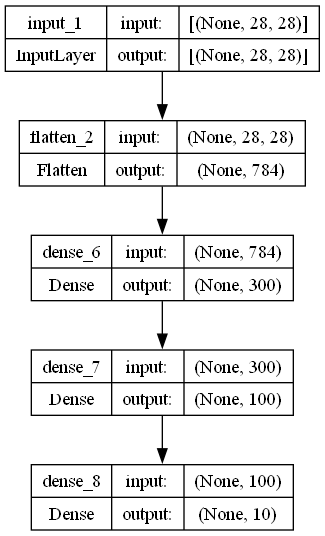

In [14]:
keras.utils.plot_model(func_model, "mlp_fmnist_classifier_functional.png", show_shapes=True)

### Compiling the Model

In [36]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
func_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

###  Training and Evaluating the Model

#### Using Callbacks

A callbacks argument lets you specify a list of objects that Keras will call during training at the start and end of training, at the start and end of each epoch and even before and after processing each batch

For example, the ``ModelCheckpoint`` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

In [15]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

 Moreover, if you use a validation set during training, you can set ``save_best_only=True`` when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Another way to implement early stopping is to simply use the ``EarlyStopping`` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the ``patience`` argument), and it will optionally roll back to the best model.

In [18]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

 If you need extra control, you can easily write your own custom callbacks

In [19]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

In [20]:
custom_cb = PrintValTrainRatioCallback()

In [23]:
func_history = func_model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb, custom_cb])

Epoch 1/30
1709/1719 [============================>.] - ETA: 0s - loss: 0.7089 - accuracy: 0.7722
val/train: 0.73
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7079 - accuracy: 0.7725 - val_loss: 0.5199 - val_accuracy: 0.8230
Epoch 2/30
1711/1719 [============================>.] - ETA: 0s - loss: 0.4857 - accuracy: 0.8309
val/train: 0.93
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4854 - accuracy: 0.8311 - val_loss: 0.4532 - val_accuracy: 0.8460
Epoch 3/30
1717/1719 [============================>.] - ETA: 0s - loss: 0.4397 - accuracy: 0.8463
val/train: 0.92
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4396 - accuracy: 0.8464 - val_loss: 0.4034 - val_accuracy: 0.8602
Epoch 4/30
1703/1719 [============================>.] - ETA: 0s - loss: 0.4113 - accuracy: 0.8557
val/train: 1.00
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4114 - accuracy: 0.8556 - val_loss: 0.4098 - val_accuracy: 0.8608
Epoch 5/30
1

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8856


[0.3278040587902069, 0.8855999708175659]

### Visualization Using TensorBoard

TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you, and more!

In [30]:
root_logdir = os.path.join(os.curdir, logs_dir)

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [31]:
run_logdir = get_run_logdir()

Next, the good news is that Keras provides a nice TensorBoard callback

In [32]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [33]:
func_history = func_model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2203 - accuracy: 0.9206 - val_loss: 0.3121 - val_accuracy: 0.8888
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2170 - accuracy: 0.9215 - val_loss: 0.3049 - val_accuracy: 0.8918
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2136 - accuracy: 0.9227 - val_loss: 0.2983 - val_accuracy: 0.8928
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2102 - accuracy: 0.9248 - val_loss: 0.2933 - val_accuracy: 0.8960
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2067 - accuracy: 0.9255 - val_loss: 0.2847 - val_accuracy: 0.8980
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2032 - accuracy: 0.9272 - val_loss: 0.3147 - val_accuracy: 0.8848
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2000 - accuracy: 0.9278 - val_loss: 0.3160 - val_accuracy: